# Специальные функции применяемые в расчетах

## Интегральная экспонента

$-Ei(-x)$ - интегральная показательная функция, рисунок [-@fig-ei_plot].


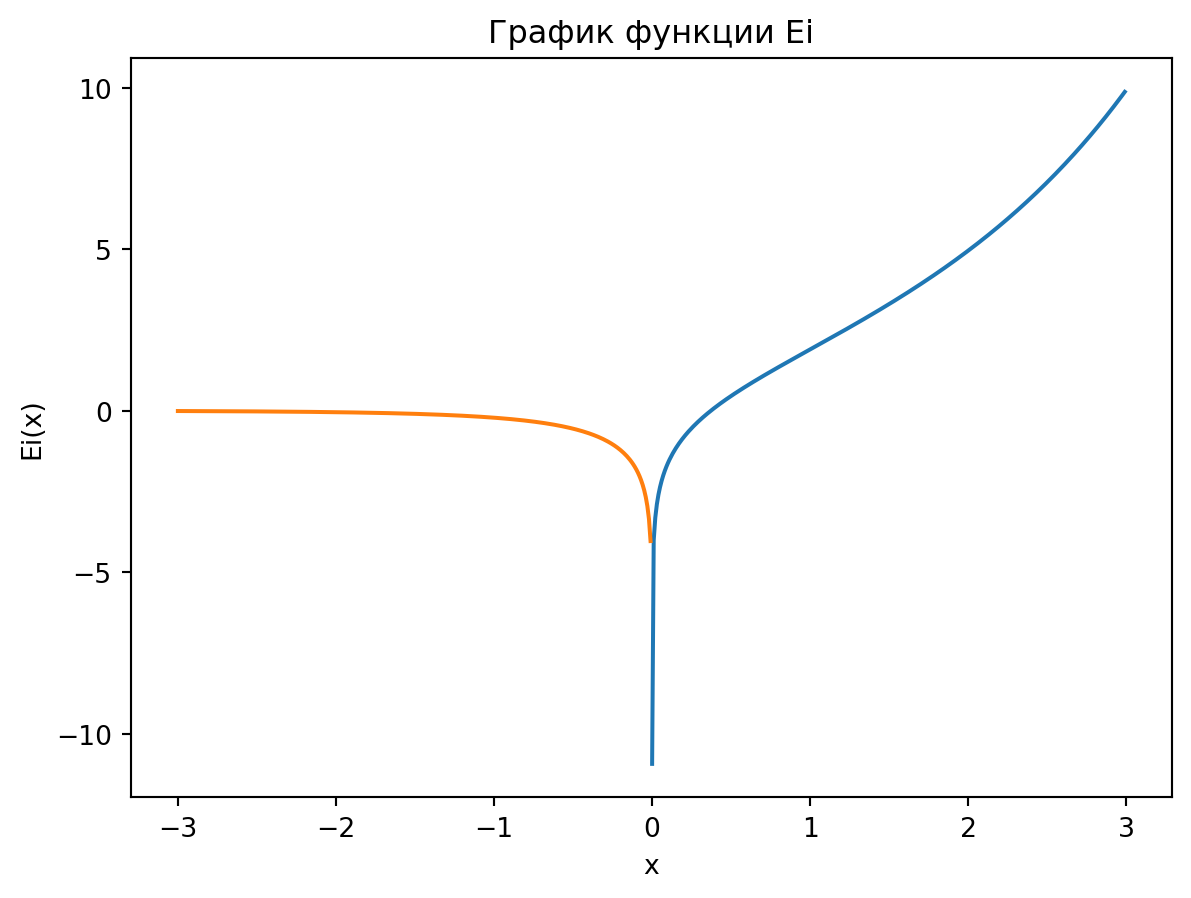

In [1]:
#| label: fig-ei_plot
#| fig-cap: График функции интегральной экспоненты Ei
# импортируем библиотеки для расчетов

# numpy используем для работы с массивами и подготовки данных для построения графиков. 
# Также в некоторых функциях используем возможности векторных расчетов numpy
import numpy as np

# matplotlib используем для построения графиков
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# scipy.special используем как альтернативный вариант расчета специальных функций
import scipy.special as sc

# для скорости и удобства используем sc.expi
# построим ветки функции для положительных и отрицательных аргументов раздельно
x = np.arange(1e-5,3,0.01)
x1 = np.arange(-3,-1e-5,0.01)

plt.plot(x, sc.expi(x))
plt.plot(x1, sc.expi(x1))
plt.title("График функции Ei")
plt.xlabel("x")
plt.ylabel("Ei(x)")
plt.show()

$$
Ei(x)=-\int\limits_{x}^{\infty}\frac{e^{-t}}{t}\,\mathrm dt
$$

Часто для проведения расчетов, особенно с использованием компьютерных библиотеке расчетов, бывает удобнее пользоваться модифицированной интегральной показательной функцией $Ei_1(x)$ или $E_1(x)$ или $Ei_n(x)$ при $n=1$. 

$$
 Ei_n(x) = \int\limits_{1}^{\infty}\frac{e^{-tx}}{t^n}\,\mathrm dt 
$$

График интегральной показательной функции $Ei_1(x)$ приведен на @fig-ei_plot. Для вещественных положительных $x\in\mathbb R, x>0$ верно $E_1(x) = - Ei( -x)$

Функцию интегральной экспоненты можно представить в виде ряда.

$$
Ei(x)=-\int\limits_{x}^{\infty}\frac{e^{-t}}{t}\,\mathrm dt=\gamma+\operatorname{ln}|-x|+\sum\limits_{n\ge1}\frac{{-x}^n}{n!\cdot n}, \;  x\in\mathbb R,\;
$$

Из приведенного выражения можно сделать выводы, что для маленьких значений аргумента функция интегральной экспоненты $E_1(x)$ может быть аппроксимирована логарифмической зависимостью.

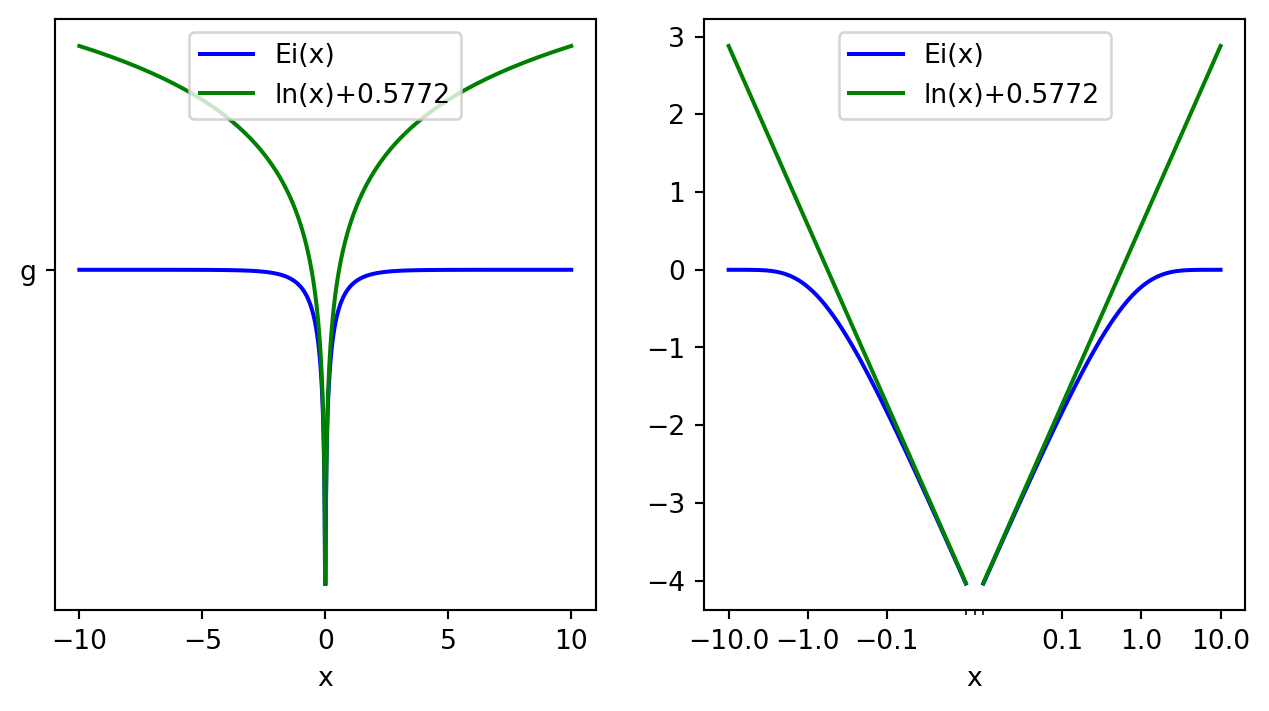

In [2]:
#| label: fig-ei_plot_comparison
#| fig-cap: Сравнение Ei и ln для обычных и полулогарифмических координат
# зададим логарифмическое распределение точек вблизи нуля для построения графика
x = np.logspace(-2, np.log10(10), 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.plot(x, sc.expi(-x), 'b', label='Ei(x)')
ax1.plot(x, np.log(x) + 0.57721566481, 'g', label='ln(x)+0.5772')
ax1.plot(-x, sc.expi(-x), 'b', 'g')
ax1.plot(-x, np.log(x) + 0.57721566481, 'g')
ax1.set_xlabel('x')
ax1.legend()

ax2.plot(x, sc.expi(-x), 'b', label='Ei(x)')
ax2.plot(x, np.log(x)  + 0.57721566481, 'g', label='ln(x)+0.5772')
ax2.plot(-x, sc.expi(-x), 'b')
ax2.plot(-x, np.log(x)  + 0.57721566481, 'g')

ax2.set_xlabel('x')
ax2.set_xscale('symlog', linthresh=0.01, linscale=0.1)
ax2.set_xticks([-10,-1,-0.1, 0.1, 1, 10])
ax2.get_xaxis().set_major_formatter(ScalarFormatter())
ax2.legend()

plt.show()

$$
E_1(x) = -ln(x) - \gamma 
$$ {#eq-ei_ln_approx}

График сравнения функций $E_1(x)$ и $ln(x)$ показан на рисунке [-@fig-ei_plot_comparison]. Видно, что хорошей аппроксимация будет только для маленьких значений аргумента $x < 0.01$. Но для решения уравнения фильтрации именно эта зона представляет наибольший интерес.

Представление интегральной экспоненты в виде логарифмической аппроксимации удобно на практике, так как логарифм легче вычислять. В большинстве языков программирования и инструментов для проведения расчетов расчет логарифма реализован по умолчанию. А для расчета интегральной экспоненты, часто приходится предпринимать дополнительные шаги, загружать дополнительные библиотеки.


## Функции Бесселя {#sec-spec_func_Bessel}


Для модифицированных функций Бесселя нулевого и первого порядка можно записать соотношения

$$
\dfrac{dI_0(u)}{du} = I_1(u) 
$$ {#eq-bessel_i_prop_1}

$$
\dfrac{dK_0(u)}{du} =-K_1(u)
$$ {#eq-bessel_k_prop_1}


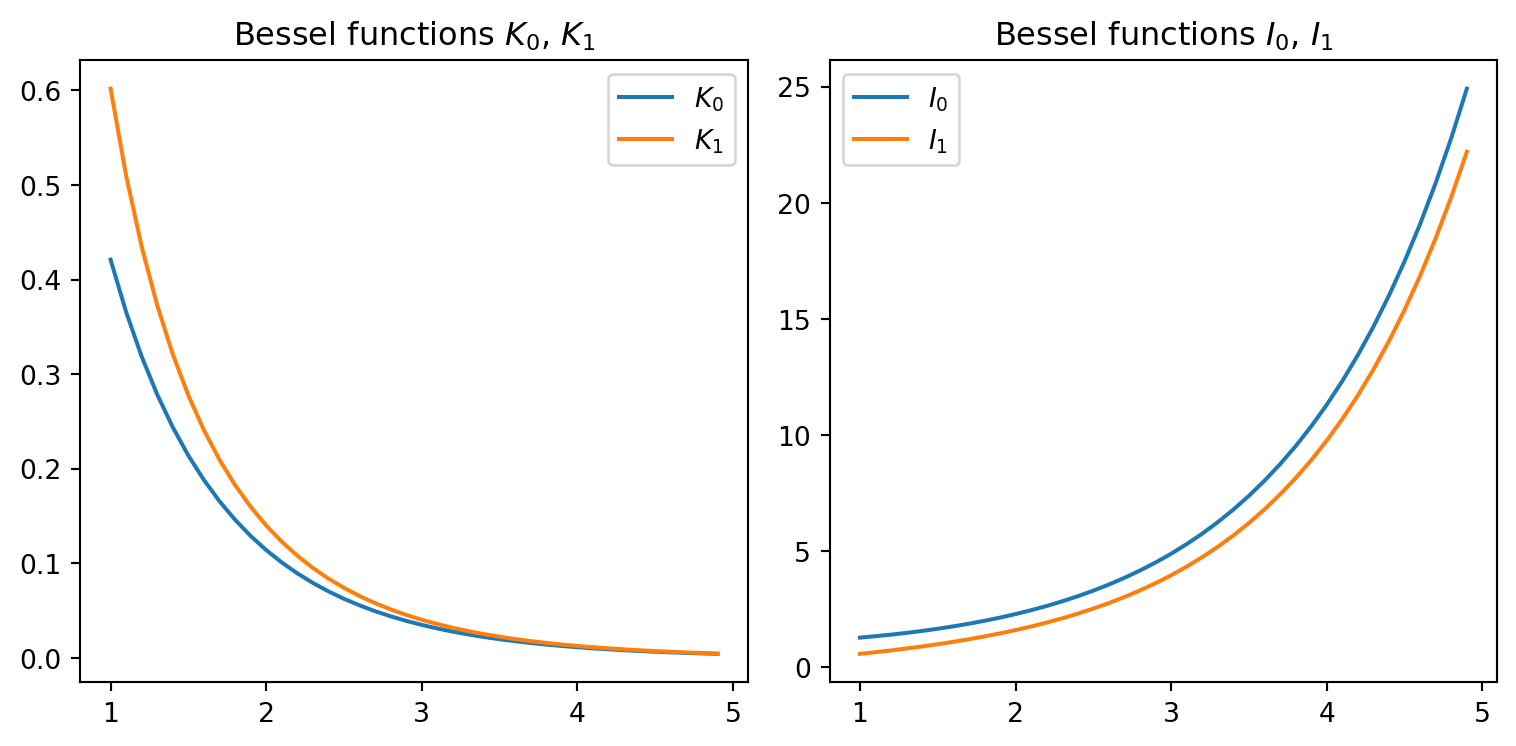

In [3]:
#| label: fig-bessel_func
#| fig-cap: графики модифицированных функций Бесселя


x = np.arange(1,5,0.1)

plt.rcParams["figure.figsize"] = (8,4)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(x, sc.kn(0,x), label='$K_0$')
ax1.plot(x, sc.kn(1,x), label='$K_1$')
ax1.set_title("Bessel functions $K_0$, $K_1$")
ax1.legend()

ax2.plot(x, sc.iv(0,x), label='$I_0$')
ax2.plot(x, sc.iv(1,x), label='$I_1$')
ax2.set_title("Bessel functions $I_0$, $I_1$")
ax2.legend()

plt.tight_layout()
plt.show()